In [1]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np
from odo import odo
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test_2.csv')

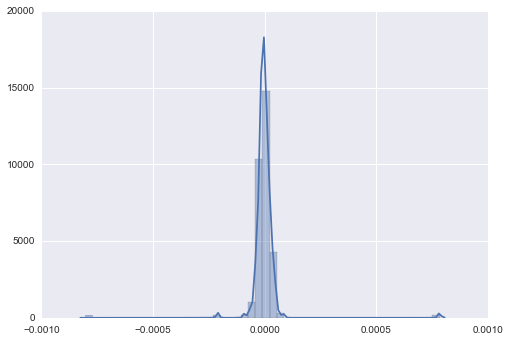

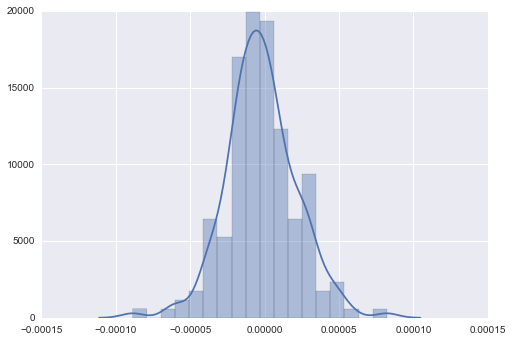

In [3]:
# Distribution of average returns
s = df.describe()
s = s.loc[:,'Ret_MinusTwo':'Ret_PlusTwo']
s = s.loc[['mean']].T.reset_index(drop=True)
sns.distplot(s)
sns.plt.figure()
sns.distplot(s[(-.0002<s['mean'])&(s['mean']<.0002)])

/Users/jlas/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jlas/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


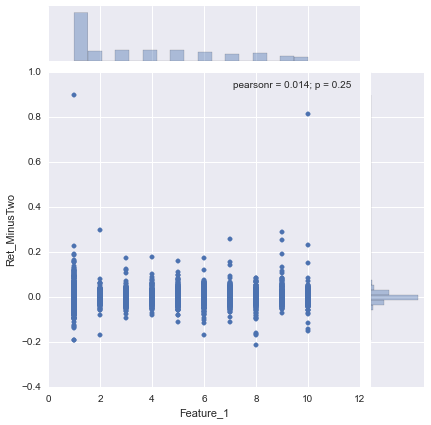

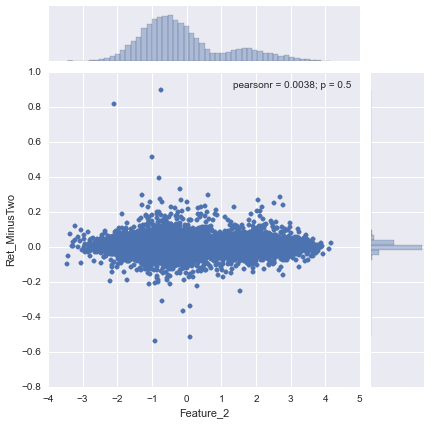

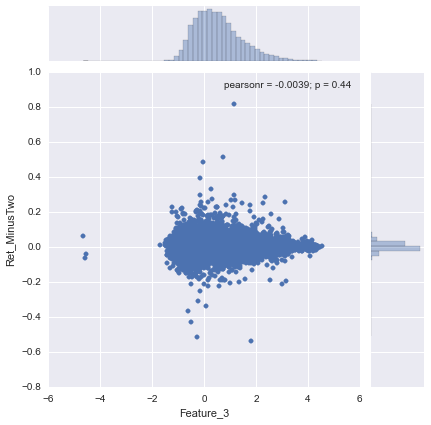

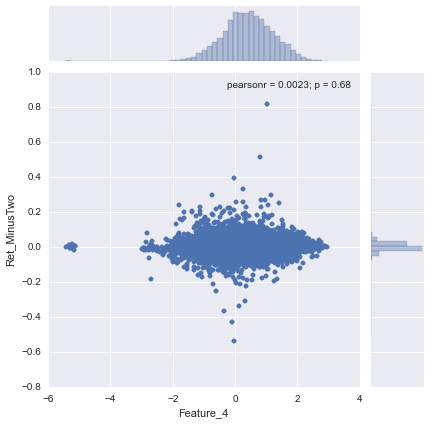

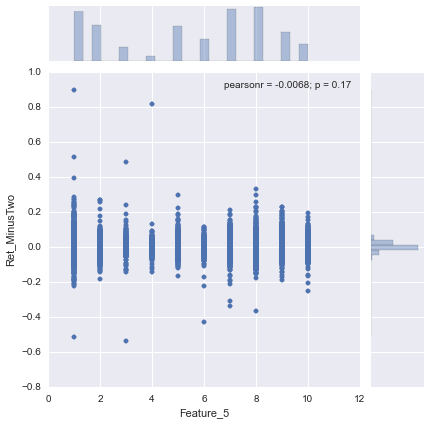

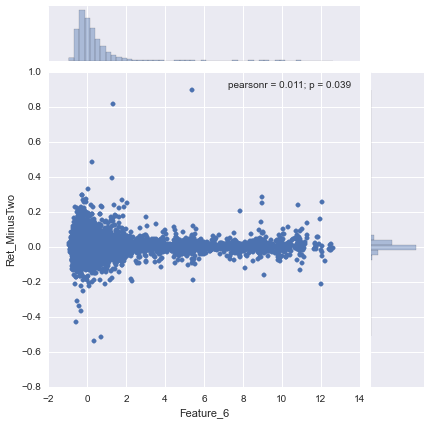

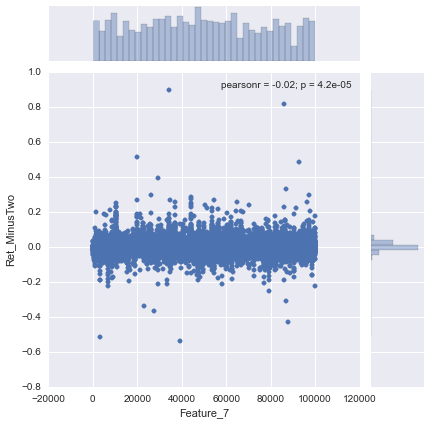

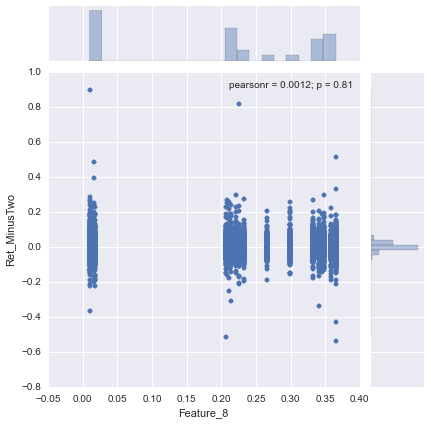

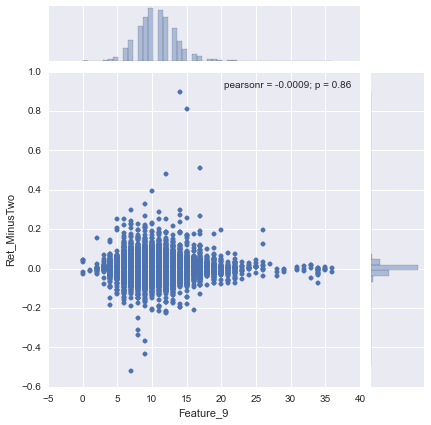

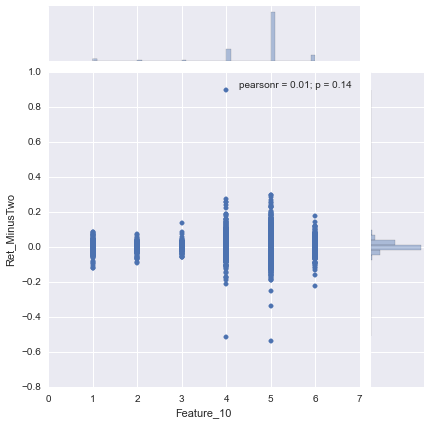

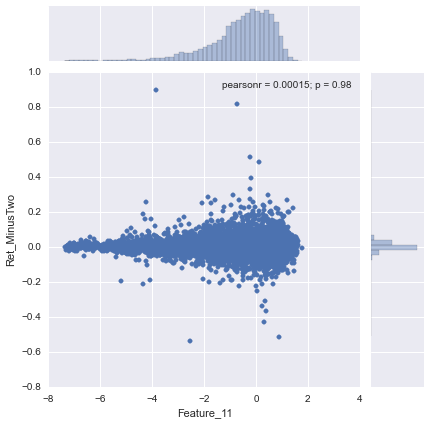

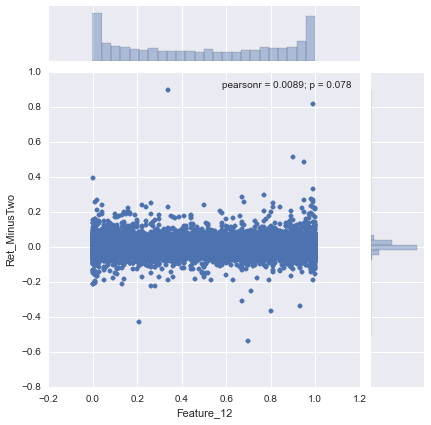

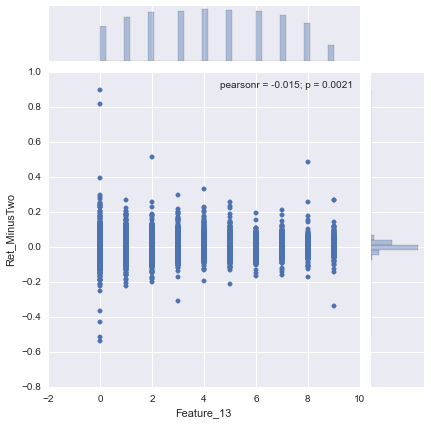

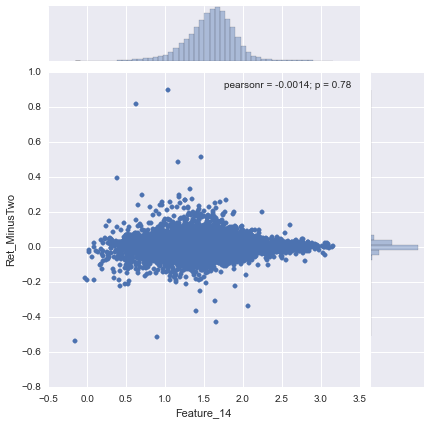

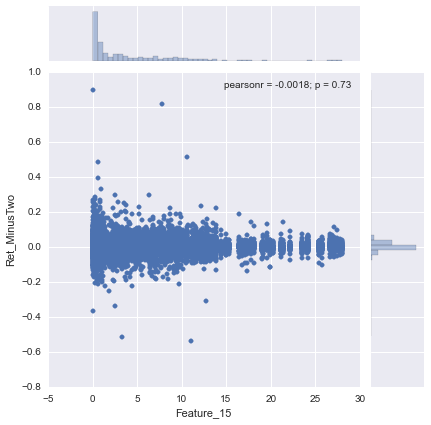

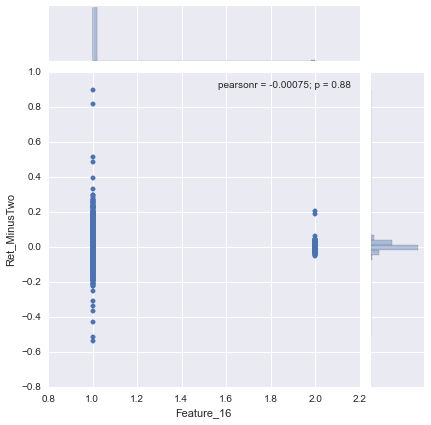

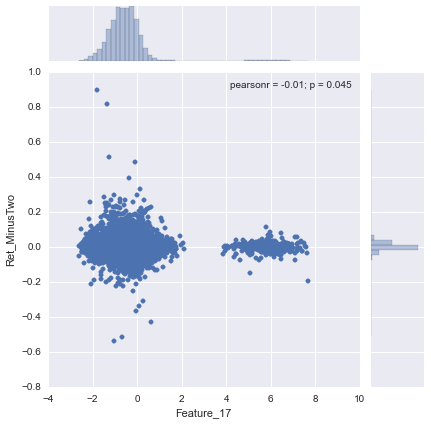

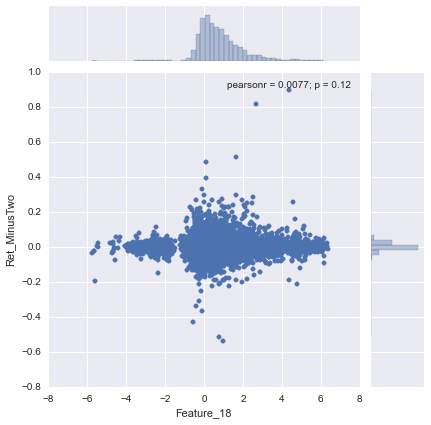

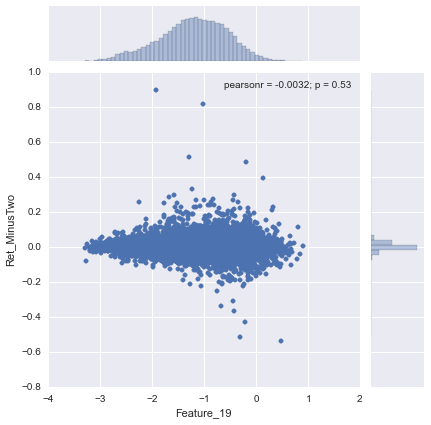

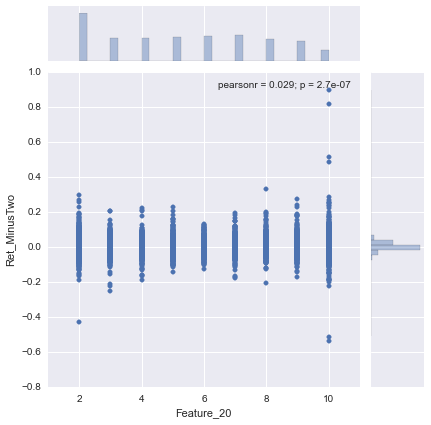

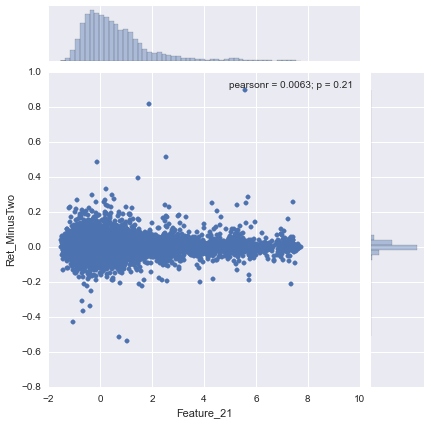

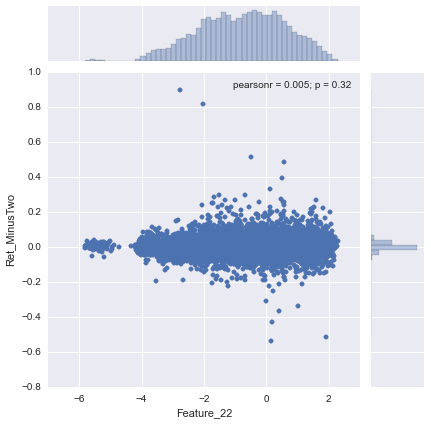

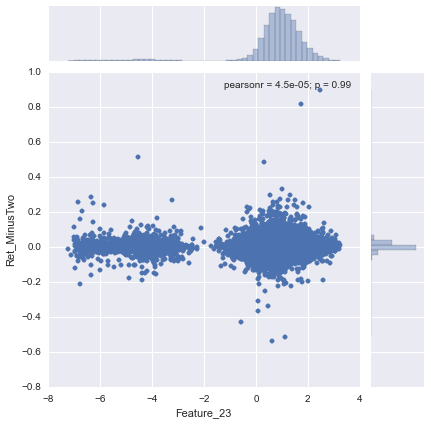

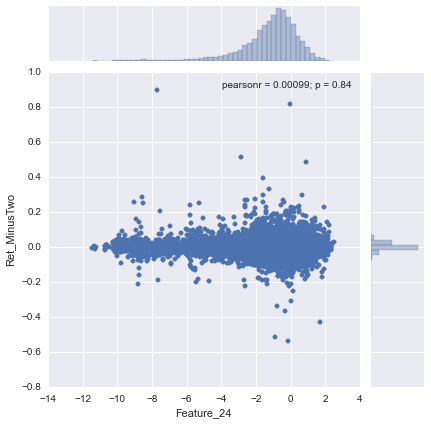

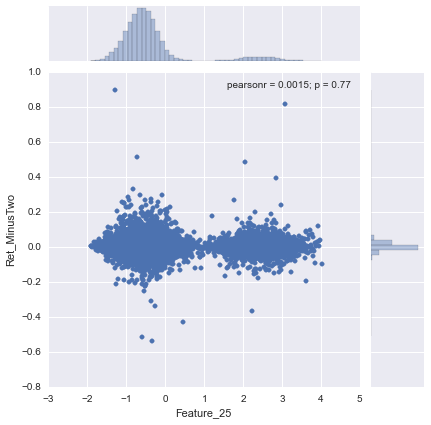

In [4]:
# plot features against one of the returns
for i in xrange(1,26):
    sns.jointplot(x='Feature_{}'.format(i), y='Ret_MinusTwo', data=df)
    sns.plt.figure()

In [9]:
# most features have at least one null value
df.isnull().any()

# 38707 rows have at least one null feature (out of 40000)
len(df[df.loc[:,'Feature_1':'Feature_25'].isnull().any(1)])

# count of nulls per feature
df.isnull().sum()

Id                     0
Feature_1          33313
Feature_2           9146
Feature_3           1237
Feature_4           7721
Feature_5              0
Feature_6           1933
Feature_7              0
Feature_8            469
Feature_9           1875
Feature_10         19471
Feature_11           987
Feature_12          1096
Feature_13           594
Feature_14           728
Feature_15          2141
Feature_16           610
Feature_17           646
Feature_18           568
Feature_19          1190
Feature_20          7826
Feature_21          1018
Feature_22          1345
Feature_23          1711
Feature_24           726
Feature_25           655
Ret_MinusTwo           0
Ret_MinusOne           0
Ret_2               1054
Ret_3               1245
                   ...  
Ret_155                0
Ret_156                0
Ret_157                0
Ret_158                0
Ret_159                0
Ret_160                0
Ret_161                0
Ret_162                0
Ret_163                0


In [10]:
# min and max of all return features
rdf = df.loc[:,'Ret_MinusTwo':'Ret_PlusTwo'].describe()
min(rdf.loc['min']),max(rdf.loc['max'])

(-0.62769021192517638, 0.89402392362836758)

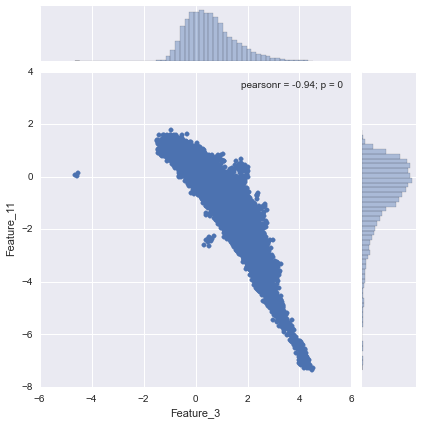

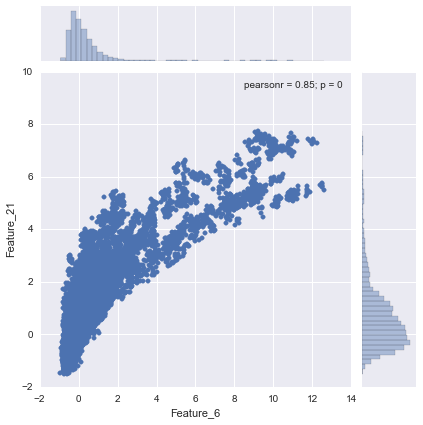

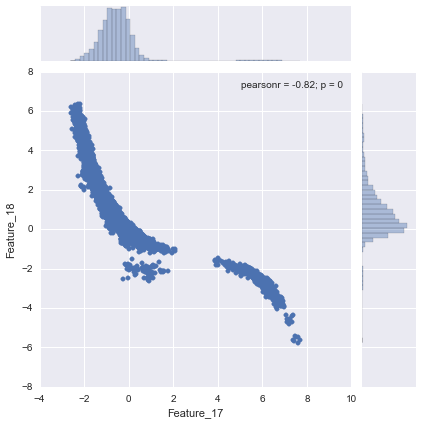

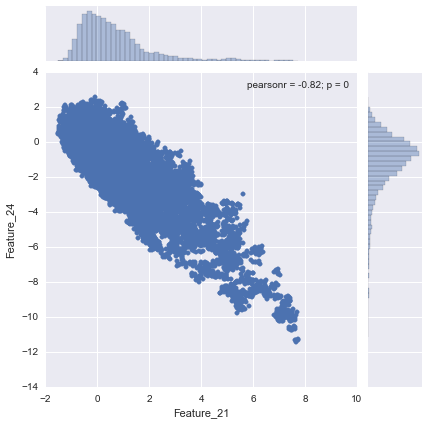

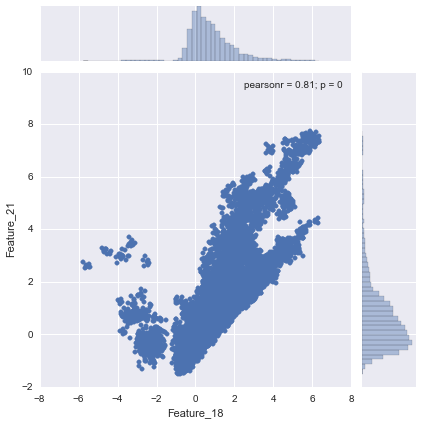

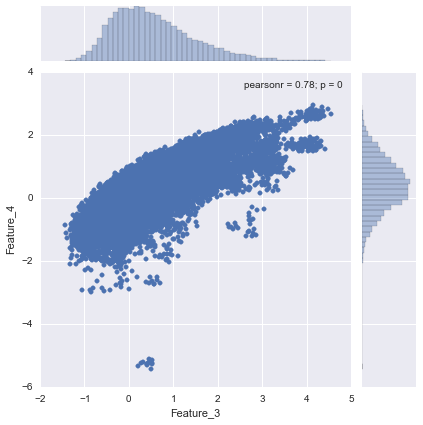

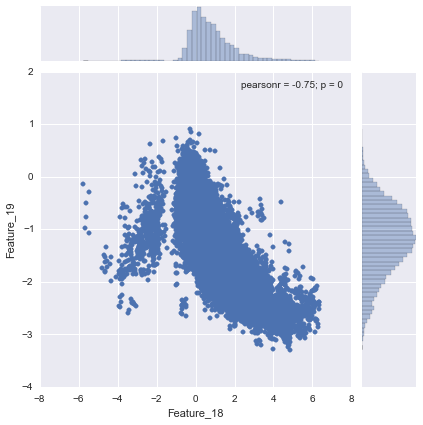

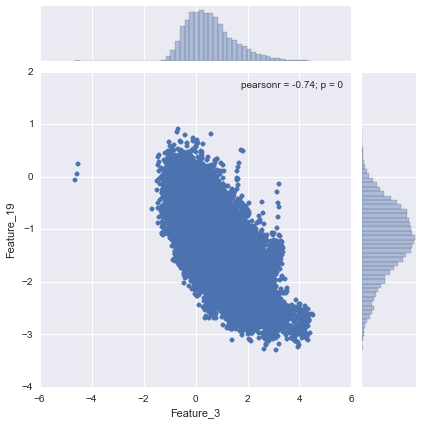

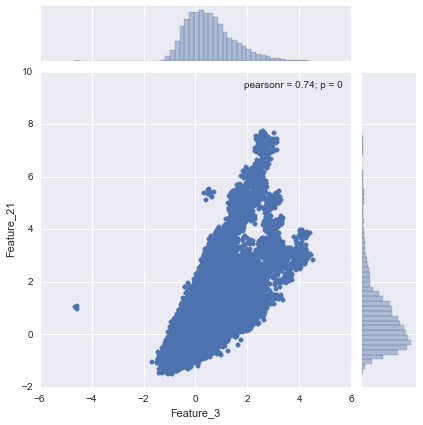

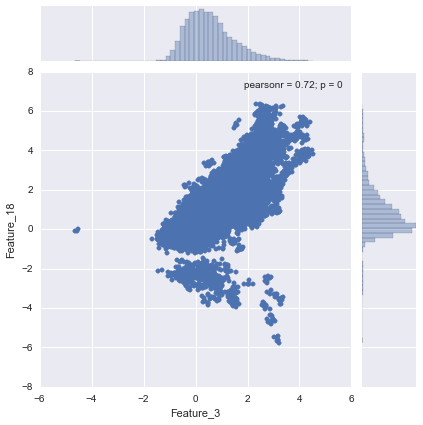

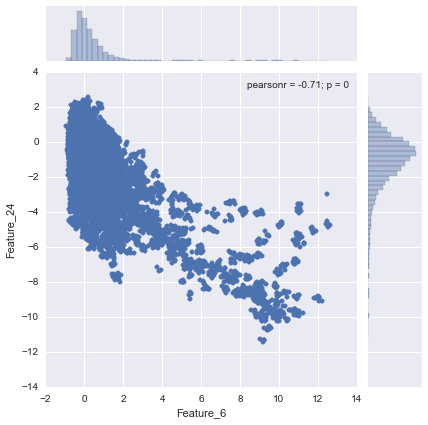

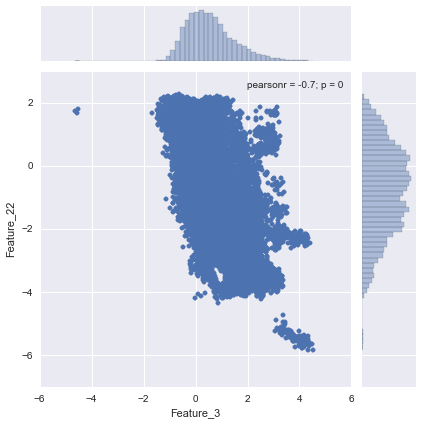

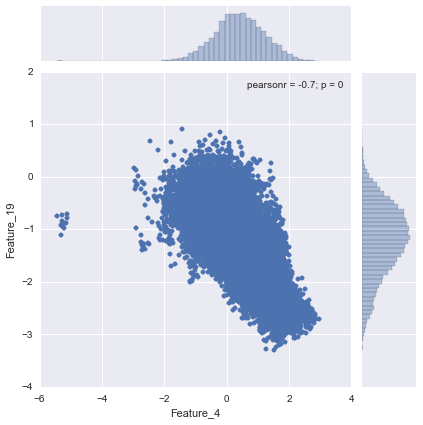

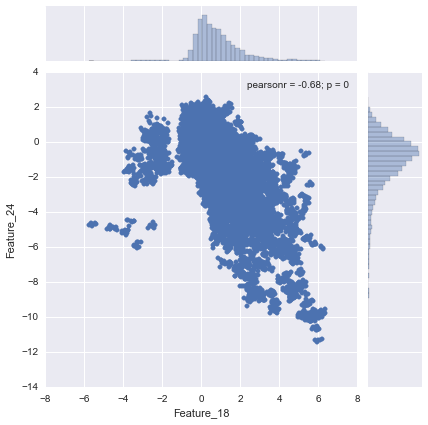

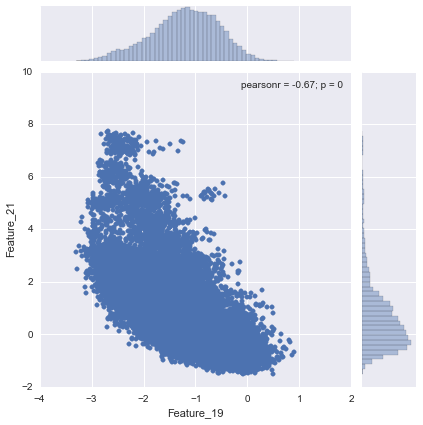

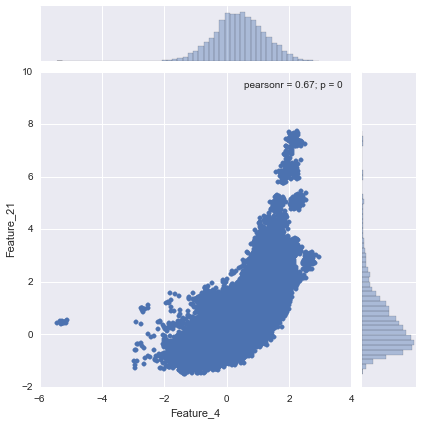

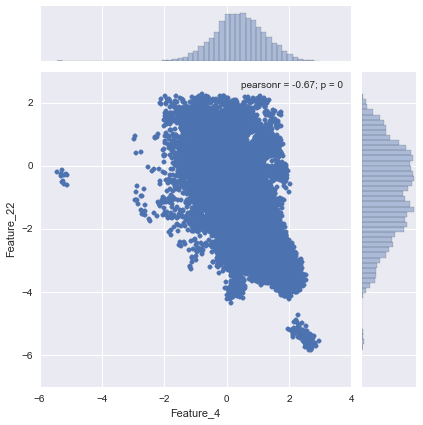

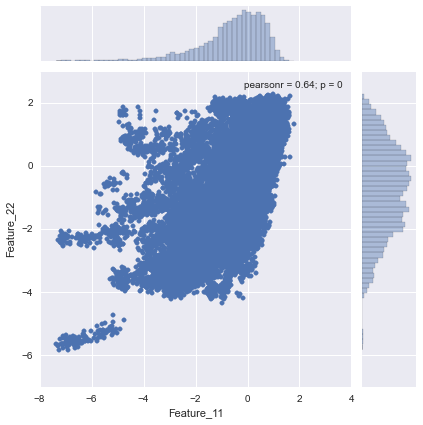

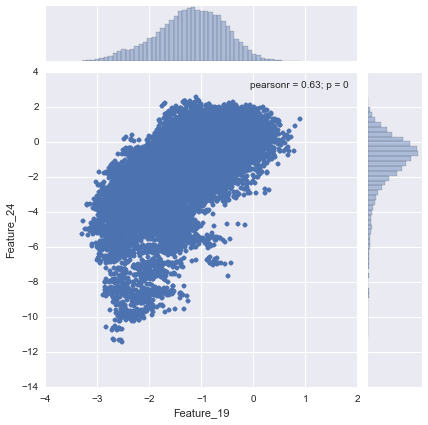

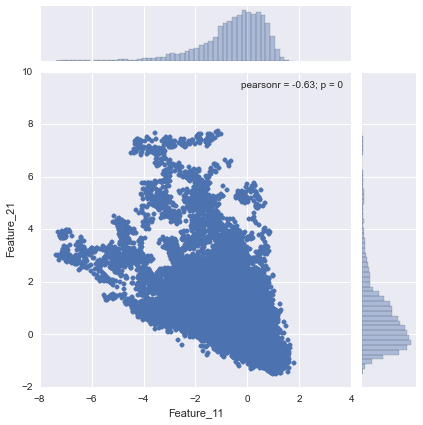

In [11]:
def corrpair(df):
    df = df.drop(['Id','Weight_Daily','Weight_Intraday'], 1)
    dfc = df.corr()
    dfcs = dfc.stack().sort_index()
    dfcs = dfcs[(dfcs<1)&(dfcs>-1)&(~dfcs.duplicated())]
    return abs(dfcs).sort_values(ascending=False)

def plot_corrpair(df, cp):
    for i in xrange(len(cp)):
        sns.jointplot(x=cp.index[i][0], y=cp.index[i][1], data=df)

# get highest correlation pairs
dfcs = corrpair(df)
top_cp = dfcs.head(20)

# plot top correlated pairs
plot_corrpair(df, top_cp)